# Metrics and scoring: quantifying the quality of predictions

From this guide: https://scikit-learn.org/stable/modules/model_evaluation.html

---

#### ⚠️📚 Most of this guide is fairly theoretical and requires detailed reading, here only the basics are covered. Parts skipped are indicated with \[🚧\].

---

## Overview

* There are **3 different APIs** for evaluating the quality of a model’s predictions:
    * **Estimator score method:** Estimators have a `score` method providing a *default evaluation criterion* for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.
    * **Scoring parameter**: Model-evaluation tools using cross-validation (such as `model_selection.cross_val_score` and `model_selection.GridSearchCV`) rely on an internal scoring strategy. This is discussed in the section *The scoring parameter: defining model evaluation rules*.
    * **Metric functions**: The `sklearn.metrics` module implements *functions* assessing prediction error for specific purposes. These metrics are detailed in sections on *Classification metrics*, *Multilabel ranking metrics*, *Regression metrics* and *Clustering metrics*.


* Finally, *Dummy estimators* are useful **to get a baseline value of those metrics for random predictions**.

* **See also:** For **“pairwise”** metrics, *between samples and not estimators or predictions*, see the [Pairwise metrics, Affinities and Kernels section](https://scikit-learn.org/stable/modules/metrics.html#metrics). 

## [The `scoring` parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

Model selection and evaluation using tools, such as 
* `model_selection.GridSearchCV` and 
* `model_selection.cross_val_score`, 

take a `scoring` parameter that controls what metric they apply to the estimators evaluated.


### [Common cases: *predefined* values](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

For the most common use cases, you can designate a *scorer object* with the `scoring` parameter; the table below shows all possible values. 

‼️ All **scorer objects** follow the convention that **higher return values are better than lower return values**. ‼️ 

Thus metrics which measure the distance between the model and the data, like `metrics.mean_squared_error`, are available as `neg_mean_squared_error` which return the negated value of the metric.

* Note 3 categories: **Classification**, **Clustering**, **Regression**.

In [1]:
%%html
<style>
table.mytable td > p {
    margin-bottom: 0em !important;
    line-height: 0.5 !important;
}
</style>

<table class="docutils align-default mytable" style="margin-left:0; margin-right:auto;">
<colgroup>
<col style="width: 31%">
<col style="width: 40%">
<col style="width: 29%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Scoring</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Classification</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score" title="sklearn.metrics.accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘balanced_accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score" title="sklearn.metrics.balanced_accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.balanced_accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘top_k_accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.top_k_accuracy_score.html#sklearn.metrics.top_k_accuracy_score" title="sklearn.metrics.top_k_accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.top_k_accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘average_precision’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score" title="sklearn.metrics.average_precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.average_precision_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_brier_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss" title="sklearn.metrics.brier_score_loss"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.brier_score_loss</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘f1’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>for binary targets</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_micro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>micro-averaged</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_macro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>macro-averaged</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>weighted average</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_samples’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>by multilabel sample</p></td>
</tr>
<tr class="row-odd"><td><p>‘neg_log_loss’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss" title="sklearn.metrics.log_loss"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.log_loss</span></code></a></p></td>
<td><p>requires <code class="docutils literal notranslate"><span class="pre">predict_proba</span></code> support</p></td>
</tr>
<tr class="row-even"><td><p>‘precision’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.precision_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p>‘recall’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.recall_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-even"><td><p>‘jaccard’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score" title="sklearn.metrics.jaccard_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.jaccard_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p><strong>Clustering</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘adjusted_mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score" title="sklearn.metrics.adjusted_mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.adjusted_mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘adjusted_rand_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score" title="sklearn.metrics.adjusted_rand_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.adjusted_rand_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘completeness_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score" title="sklearn.metrics.completeness_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.completeness_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘fowlkes_mallows_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score" title="sklearn.metrics.fowlkes_mallows_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.fowlkes_mallows_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘homogeneity_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score" title="sklearn.metrics.homogeneity_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.homogeneity_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score" title="sklearn.metrics.mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘normalized_mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score" title="sklearn.metrics.normalized_mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.normalized_mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘rand_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.rand_score.html#sklearn.metrics.rand_score" title="sklearn.metrics.rand_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.rand_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘v_measure_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score" title="sklearn.metrics.v_measure_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.v_measure_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p><strong>Regression</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘explained_variance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score" title="sklearn.metrics.explained_variance_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.explained_variance_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘max_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.max_error.html#sklearn.metrics.max_error" title="sklearn.metrics.max_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.max_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error" title="sklearn.metrics.mean_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_error</span></code></a></p></td>
<td><b>Note "neg_" here and in several others!</b></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_root_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_log_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error" title="sklearn.metrics.mean_squared_log_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_log_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_median_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error" title="sklearn.metrics.median_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.median_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘r2’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score" title="sklearn.metrics.r2_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.r2_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_poisson_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_poisson_deviance.html#sklearn.metrics.mean_poisson_deviance" title="sklearn.metrics.mean_poisson_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_poisson_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_gamma_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_gamma_deviance.html#sklearn.metrics.mean_gamma_deviance" title="sklearn.metrics.mean_gamma_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_gamma_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_percentage_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error" title="sklearn.metrics.mean_absolute_percentage_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_percentage_error</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>

Usage examples:

In [2]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

X, y = datasets.load_iris(return_X_y=True)

In [3]:
clf = svm.SVC(random_state=0)
cross_val_score(clf, X, y, cv=5, scoring='recall_macro')

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [4]:
try:
    model = svm.SVC()
    cross_val_score(model, X, y, cv=5, scoring='wrong_choice')
except ValueError as e:
    print(f"ValueError: {e}")

ValueError: 'wrong_choice' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.


In [5]:
# To view the list:
import sklearn.metrics
from IPython.display import display
display(list(sklearn.metrics.SCORERS.keys()))

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

#### 💡 Implementation note:

There are two concepts:
1. *Functions* measuring prediction accuracy / metrics functions
    * Examples are the list above from `sklearn.metrics.SCORERS.keys()`
2. The *scorer objects* for those functions
    * Listed under `sklearn.metrics.SCORERS`

In [6]:
# To view the list of SCORER OBJECTS.
objs = list(sklearn.metrics.SCORERS.values())
print_ = [(str(o), type(o)) for o in objs]

for str_repr, obj_itself in print_:
    print(f"str_repr:\t{str_repr}\nobj_type:\t{obj_itself}")
    print()

str_repr:	make_scorer(explained_variance_score)
obj_type:	<class 'sklearn.metrics._scorer._PredictScorer'>

str_repr:	make_scorer(r2_score)
obj_type:	<class 'sklearn.metrics._scorer._PredictScorer'>

str_repr:	make_scorer(max_error, greater_is_better=False)
obj_type:	<class 'sklearn.metrics._scorer._PredictScorer'>

str_repr:	make_scorer(median_absolute_error, greater_is_better=False)
obj_type:	<class 'sklearn.metrics._scorer._PredictScorer'>

str_repr:	make_scorer(mean_absolute_error, greater_is_better=False)
obj_type:	<class 'sklearn.metrics._scorer._PredictScorer'>

str_repr:	make_scorer(mean_absolute_percentage_error, greater_is_better=False)
obj_type:	<class 'sklearn.metrics._scorer._PredictScorer'>

str_repr:	make_scorer(mean_squared_error, greater_is_better=False)
obj_type:	<class 'sklearn.metrics._scorer._PredictScorer'>

str_repr:	make_scorer(mean_squared_log_error, greater_is_better=False)
obj_type:	<class 'sklearn.metrics._scorer._PredictScorer'>

str_repr:	make_scorer(mean_

### [Defining your scoring strategy from metric functions](https://scikit-learn.org/stable/modules/model_evaluation.html#defining-your-scoring-strategy-from-metric-functions)

The module `sklearn.metrics` also exposes a set of simple functions measuring a *prediction error* given *ground truth* and *prediction*:
* \[❗\] functions ending with `_score` return a value to **maximize, the higher the better**.
* \[❗\] functions ending with `_error` or `_loss` return a value to **minimize, the lower the better**. 
    * When converting into a *scorer object* using `make_scorer()`, set the `greater_is_better` parameter to `False` (`True` by default).

**Many metrics are not given names to be used as scoring values**, sometimes because they require additional parameters, such as `fbeta_score`. In such cases, **you need to generate an appropriate scoring object**. The simplest way to generate a callable object for scoring is by using `make_scorer`. *That function converts metrics into callables that can be used for model evaluation*.

**Example:**

One typical use case is to wrap an existing metric function from the library *with non-default values for its parameters*, such as the `beta` parameter for the `fbeta_score` function:

In [7]:
from sklearn.metrics import (
    fbeta_score,  # <-- we will wrap this. 
    make_scorer   # <-- using this.
)

ftwo_scorer = make_scorer(fbeta_score, beta=2)  # Instantiate a SCORER object from FUNCTION, setting PARAMETER (here, beta=2)

In [8]:
# Now use this new scorer object in parameter search.

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

grid = GridSearchCV(
    LinearSVC(), 
    param_grid={'C': [1, 10]},
    scoring=ftwo_scorer,  # <-- our scorer object from above. 
    cv=5
)

💡 The second use case is to **build a completely custom scorer object** from a *simple python function* using `make_scorer`, which can take several parameters:

* the python function you want to use (`my_custom_loss_func` in the example below)
* whether the python function returns a score (`greater_is_better=True`, the default) or a loss (`greater_is_better=False`). If a loss, the output of the python function is negated by the scorer object, conforming to the cross validation convention that scorers return higher values for better models.
* for classification metrics only: whether the python function you provided requires continuous decision certainties (`needs_threshold=True`). The default value is `False`.
* any additional parameters, such as `beta` or `labels` in `f1_score`.

Here is an example of building custom scorers, and of using the `greater_is_better` parameter:

In [9]:
import numpy as np

def my_custom_loss_func(y_true, y_pred):
    diff = np.abs(y_true - y_pred).max()
    return np.log1p(diff)

In [10]:
# score will negate the return value of `my_custom_loss_func`,
# which will be np.log(2), 0.693, given the values for X
# and y defined below.
score = make_scorer(
    my_custom_loss_func, 
    greater_is_better=False  # Note.
)

In [11]:
X = [[1], [1]]
y = [0, 1]

In [12]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)  # Note use of DummyClassifier!
clf = clf.fit(X, y)

In [13]:
# Result of calling our python function directly:
my_custom_loss_func(y, clf.predict(X))

0.6931471805599453

In [14]:
# Now using the scorer object, note the -ve:
score(clf, X, y)

-0.6931471805599453

#### [💡 Implementing your own scoring object](https://scikit-learn.org/stable/modules/model_evaluation.html#implementing-your-own-scoring-object)

You can generate even more flexible model scorers by constructing your own scoring object from scratch, without using the `make_scorer` factory. 

For a *callable* to be a **scorer**, it needs to **meet the protocol specified by the following *two rules***:

1. It can be called with parameters `(estimator, X, y)`, where: 
    * `estimator` is the model that should be evaluated, 
    * `X` is validation data, and 
    * `y` is the ground truth target for `X` (in the supervised case) or `None` (in the unsupervised case).
2. It returns a *floating point number* that quantifies the estimator prediction quality on `X`, with reference to `y`. Again, **by convention higher numbers are better**, so if your scorer returns loss, that value should be negated.

💡 See also **Note: Using custom scorers in functions where n_jobs > 1** at end of [section](https://scikit-learn.org/stable/modules/model_evaluation.html#implementing-your-own-scoring-object).

#### [Using *multiple metric* evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#using-multiple-metric-evaluation)

Scikit-learn also permits evaluation of **multiple metrics** (but only) in:
* `GridSearchCV`, 
* `RandomizedSearchCV` and 
* `cross_validate`.

There are **three ways** to specify multiple scoring metrics for the scoring parameter:

**1. As an iterable of string metrics:**

In [15]:
scoring = ['accuracy', 'precision']

**2. As a `dict` mapping the scorer name to the scoring function:**

* Note that the `dict` values can either be *scorer functions* or one of the *predefined metric strings*.

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec': 'precision'
}
scoring

{'accuracy': make_scorer(accuracy_score), 'prec': 'precision'}

**3. As a *callable* that returns a *dictionary of scores*:**

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

# A sample toy binary classification dataset
X, y = datasets.make_classification(n_classes=2, random_state=0)

print("X.shape", X.shape)
print("y.shape", y.shape)
print("X[:3]:\n", X[:3])
print("y[:3]:\n", y[:3])

X.shape (100, 20)
y.shape (100,)
X[:3]:
 [[-0.03926799  0.13191176 -0.21120598 -1.2141474   1.05004467 -0.42132759
   0.76877064  0.87569568  2.45122972 -0.48024204 -2.13264106 -0.52325094
   0.70869527 -1.98056559 -1.36516288 -0.94893281  1.94709864  1.97698901
   1.02122474 -0.46931074]
 [ 0.77416061  0.10490717 -0.33281176 -1.27034986  0.37911283 -0.82282832
  -0.61262574  1.49613964  0.56845892 -0.46749317 -1.80170793 -0.8624933
  -0.63119194  0.13391292 -0.97240289 -0.77445897  1.34622107  1.2678044
   0.62251914 -1.49026539]
 [-0.0148577   0.67057045 -0.21416666  0.25020227  0.05548937 -1.56699471
   0.03976673  0.26568797  1.84959125  0.71998373  0.27713603 -1.10290621
   0.01927938 -0.7075057   0.72310049  0.82140594  0.02461213 -0.10486202
  -0.10169727 -0.45130304]]
y[:3]:
 [0 0 1]


In [18]:
svm = LinearSVC(random_state=0)

In [19]:
# A custom CALLABLE that returns a DICTIONARY of SCORES:
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {
        'tn': cm[0, 0], 
        'fp': cm[0, 1],
        'fn': cm[1, 0], 
        'tp': cm[1, 1]
    }

In [20]:
cv_results = cross_validate(
    svm, 
    X, 
    y, 
    cv=5,
    scoring=confusion_matrix_scorer,
    verbose=2,
)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [21]:
print(list(cv_results.keys()))

['fit_time', 'score_time', 'test_tn', 'test_fp', 'test_fn', 'test_tp']


In [22]:
# Getting the test set true positive scores
print(cv_results['test_tp'])

[10  9  8  7  8]


In [23]:
# Getting the test set false negative scores
print(cv_results['test_fn'])

[0 1 2 3 2]


## Metric Categories

The following metric categories are covered:
1. Classification metrics
2. Multilabel ranking metrics
3. Clustering metrics
4. Regression metrics

## [Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

* The `sklearn.metrics` module implements several *loss*, *score*, and *utility* functions to measure classification performance. 
* Some metrics might require: 
    * *probability estimates of the positive class*, 
    * *confidence values*, or 
    * *binary decisions values*. 
* Most implementations allow each sample to provide a *weighted contribution* to the overall score, through the `sample_weight` parameter.

**Some of these are restricted to the `binary classification` case:**

<table class="longtable docutils align-default mytable">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve" title="sklearn.metrics.precision_recall_curve"><code class="xref py py-obj docutils literal notranslate"><span class="pre">precision_recall_curve</span></code></a>(y_true,&nbsp;probas_pred,&nbsp;*)</p></td>
<td><p>Compute precision-recall pairs for different probability thresholds.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve" title="sklearn.metrics.roc_curve"><code class="xref py py-obj docutils literal notranslate"><span class="pre">roc_curve</span></code></a>(y_true,&nbsp;y_score,&nbsp;*[,&nbsp;pos_label,&nbsp;…])</p></td>
<td><p>Compute Receiver operating characteristic (ROC).</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.det_curve.html#sklearn.metrics.det_curve" title="sklearn.metrics.det_curve"><code class="xref py py-obj docutils literal notranslate"><span class="pre">det_curve</span></code></a>(y_true,&nbsp;y_score[,&nbsp;pos_label,&nbsp;…])</p></td>
<td><p>Compute error rates for different probability thresholds.</p></td>
</tr>
</tbody>
</table>

**Others also work in the `multiclass` case:**

<table class="longtable docutils align-default mytable">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score" title="sklearn.metrics.balanced_accuracy_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">balanced_accuracy_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Compute the balanced accuracy.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score" title="sklearn.metrics.cohen_kappa_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">cohen_kappa_score</span></code></a>(y1,&nbsp;y2,&nbsp;*[,&nbsp;labels,&nbsp;…])</p></td>
<td><p>Cohen’s kappa: a statistic that measures inter-annotator agreement.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix" title="sklearn.metrics.confusion_matrix"><code class="xref py py-obj docutils literal notranslate"><span class="pre">confusion_matrix</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Compute confusion matrix to evaluate the accuracy of a classification.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.hinge_loss.html#sklearn.metrics.hinge_loss" title="sklearn.metrics.hinge_loss"><code class="xref py py-obj docutils literal notranslate"><span class="pre">hinge_loss</span></code></a>(y_true,&nbsp;pred_decision,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Average hinge loss (non-regularized).</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef" title="sklearn.metrics.matthews_corrcoef"><code class="xref py py-obj docutils literal notranslate"><span class="pre">matthews_corrcoef</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Compute the Matthews correlation coefficient (MCC).</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">roc_auc_score</span></code></a>(y_true,&nbsp;y_score,&nbsp;*[,&nbsp;average,&nbsp;…])</p></td>
<td><p>Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.top_k_accuracy_score.html#sklearn.metrics.top_k_accuracy_score" title="sklearn.metrics.top_k_accuracy_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">top_k_accuracy_score</span></code></a>(y_true,&nbsp;y_score,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Top-k Accuracy classification score.</p></td>
</tr>
</tbody>
</table>

**Some also work in the `multilabel` case:**

<table class="longtable docutils align-default mytable">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score" title="sklearn.metrics.accuracy_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">accuracy_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Accuracy classification score.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report" title="sklearn.metrics.classification_report"><code class="xref py py-obj docutils literal notranslate"><span class="pre">classification_report</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Build a text report showing the main classification metrics.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">f1_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;labels,&nbsp;…])</p></td>
<td><p>Compute the F1 score, also known as balanced F-score or F-measure.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score" title="sklearn.metrics.fbeta_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">fbeta_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*,&nbsp;beta[,&nbsp;…])</p></td>
<td><p>Compute the F-beta score.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.hamming_loss.html#sklearn.metrics.hamming_loss" title="sklearn.metrics.hamming_loss"><code class="xref py py-obj docutils literal notranslate"><span class="pre">hamming_loss</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;sample_weight])</p></td>
<td><p>Compute the average Hamming loss.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score" title="sklearn.metrics.jaccard_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">jaccard_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;labels,&nbsp;…])</p></td>
<td><p>Jaccard similarity coefficient score.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss" title="sklearn.metrics.log_loss"><code class="xref py py-obj docutils literal notranslate"><span class="pre">log_loss</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;eps,&nbsp;…])</p></td>
<td><p>Log loss, aka logistic loss or cross-entropy loss.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix" title="sklearn.metrics.multilabel_confusion_matrix"><code class="xref py py-obj docutils literal notranslate"><span class="pre">multilabel_confusion_matrix</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*)</p></td>
<td><p>Compute a confusion matrix for each class or sample.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support" title="sklearn.metrics.precision_recall_fscore_support"><code class="xref py py-obj docutils literal notranslate"><span class="pre">precision_recall_fscore_support</span></code></a>(y_true,&nbsp;…)</p></td>
<td><p>Compute precision, recall, F-measure and support for each class.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">precision_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;labels,&nbsp;…])</p></td>
<td><p>Compute the precision.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">recall_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;labels,&nbsp;…])</p></td>
<td><p>Compute the recall.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">roc_auc_score</span></code></a>(y_true,&nbsp;y_score,&nbsp;*[,&nbsp;average,&nbsp;…])</p></td>
<td><p>Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss" title="sklearn.metrics.zero_one_loss"><code class="xref py py-obj docutils literal notranslate"><span class="pre">zero_one_loss</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;…])</p></td>
<td><p>Zero-one classification loss.</p></td>
</tr>
</tbody>
</table>

**And some work with `binary and multilabel (but not multiclass)` problems:**

<table class="longtable docutils align-default mytable">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score" title="sklearn.metrics.average_precision_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">average_precision_score</span></code></a>(y_true,&nbsp;y_score,&nbsp;*)</p></td>
<td><p>Compute average precision (AP) from prediction scores.</p></td>
</tr>
</tbody>
</table>

### [From binary to multiclass and multilabel](https://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel)

Some metrics are essentially defined for *binary classification* tasks (e.g. `f1_score`, `roc_auc_score`). 

⚠️ In these cases, **by default only the positive label is evaluated**, assuming by default that the positive class is labelled `1` (though this may be configurable through the `pos_label` parameter).

In **extending a binary metric to multiclass or multilabel problems**, the data is treated as *a collection of binary problems, one for each class*.

There are then a number of ways to **average** binary metric calculations across the set of classes, each of which may be useful in some scenario. 

Where available, you should select among these using the average parameter.

‼️ These averaging strategies are **important to understand**:
* `"macro"` simply calculates the mean of the binary metrics, **giving equal weight to each class**. 
    * In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. 
    * On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.
* `"weighted"` accounts for class imbalance by computing the average of binary metrics in which *each class’s score is weighted by its presence in the true data sample*.
* `"micro"` gives **each sample-class pair an equal contribution to the overall metric** (except as a result of sample-weight). 
    * Rather than summing the metric per class, **this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient**. 
    * Micro-averaging **may be preferred in multilabel settings**, including multiclass classification where a majority class is to be ignored.
    * \[🤔\] Confusing. Explained by examople here: https://datascience.stackexchange.com/a/24051
* `"samples"` **applies only to multilabel problems**. It *does not calculate a per-class measure*, instead calculating the *metric over the true and predicted classes **for each sample** in the evaluation data*, and returning their (`sample_weight`-weighted) average.
* Selecting `average=None` will return an array with the score for each class.

#### 📑 [Accuracy score](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)

The `accuracy_score` function computes the accuracy, either the fraction (default) or the count (`normalize=False`) of correct predictions.

In *multilabel* classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is `1.0`; otherwise it is `0.0`.

If $\hat{y}_i$ is the predicted value of the $i$-th sample and is the corresponding true value, then the fraction of correct predictions over $n_{samples}$ is defined as:

$
\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_{samples}} \sum^{n_{samples}-1}_{i=0} 1(\hat{y}_i=y_i)
$

where $1(x)$ is the [indicator function](https://en.wikipedia.org/wiki/Indicator_function).

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score  # Note.
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

In [25]:
accuracy_score(y_true, y_pred)

0.5

In [26]:
accuracy_score(y_true, y_pred, normalize=False)  # Count.

2

In [27]:
# **Multilabel** case:
accuracy_score(
    np.array(
        [
            [0, 1], 
            [1, 1]
        ]
    ), 
    np.array(
        [
            [1, 1],
            [1, 1]
        ]
    )
)

0.5

#### 📑 [Top-k accuracy score](https://scikit-learn.org/stable/modules/model_evaluation.html#top-k-accuracy-score)

🚧 TBD

#### 📑 [Balanced accuracy score](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score)

🚧 TBD

#### 📑 [Cohen’s kappa](https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-s-kappa)

🚧 TBD

#### 📑 [Confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix)

The `confusion_matrix` [(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) function evaluates classification accuracy by computing the confusion matrix with each **row corresponding to the true class** (Wikipedia and other references may use different convention for axes).

By definition, entry $i,j$ in a confusion matrix is the number of observations actually in group $i$, but predicted to be in group $j$. 

Here is an example:

In [28]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

[plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) can be used to visually represent a confusion matrix as shown in the [Confusion matrix example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py), which creates the following figure:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_0011.png" width=500 />

The parameter `normalize` allows to report ratios instead of counts. The confusion matrix can be normalized in 3 different ways: `'pred'`, `'true'`, and `'all'` which will divide the counts by the sum of each columns, rows, or the entire matrix, respectively.

In [29]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]

print("normalize=None:\n", confusion_matrix(y_true, y_pred, normalize=None), "\n")
print("normalize='pred':\n", confusion_matrix(y_true, y_pred, normalize='pred'), "\n")
print("normalize='true':\n", confusion_matrix(y_true, y_pred, normalize='true'), "\n")
print("normalize='all':\n", confusion_matrix(y_true, y_pred, normalize='all'), "\n")

normalize=None:
 [[2 1]
 [2 3]] 

normalize='pred':
 [[0.5  0.25]
 [0.5  0.75]] 

normalize='true':
 [[0.66666667 0.33333333]
 [0.4        0.6       ]] 

normalize='all':
 [[0.25  0.125]
 [0.25  0.375]] 



For binary problems, we can get counts of true negatives, false positives, false negatives and true positives as follows:

In [30]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
display(tn, fp, fn, tp)

2

1

2

3

---
#### [Confusion Matrix Plot Example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

Example of confusion matrix usage to evaluate the quality of the output of a classifier on the *iris* data set. 

* The diagonal elements represent the number of points for which the predicted label is equal to the true label, 
* while off-diagonal elements are those that are mislabeled by the classifier. 

The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

The figures show the confusion matrix *with and without normalization* by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix  # <-- ❗ Note.

In [33]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
print(class_names)

['setosa' 'versicolor' 'virginica']


In [34]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
# Run classifier, using a model that is too regularized (C too low) to see the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

In [36]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", 'true')
]

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


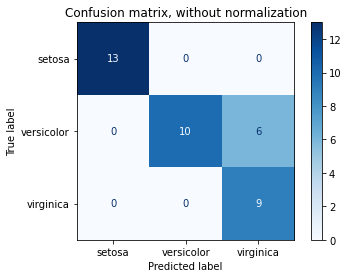

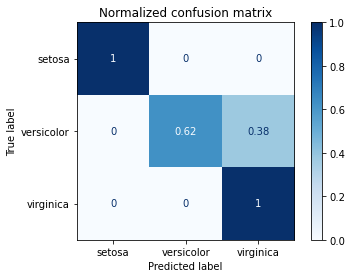

In [37]:
with np.printoptions(precision=2):
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(
            classifier, 
            X_test, 
            y_test,
            display_labels=class_names,
            cmap=plt.cm.Blues,
            normalize=normalize
        )
        disp.ax_.set_title(title)
        
        print(title)
        print(disp.confusion_matrix)

plt.show()

---

#### 📑 [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

The `classification_report` function builds a text report showing the main classification metrics. 

Here is a small example with custom target_names and inferred labels:

In [38]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]

target_names = ['class 0', 'class 1', 'class 2']

print(
    classification_report(
        y_true, 
        y_pred, 
        target_names=target_names  # Note.
    )
)

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



#### 📑 [Hamming loss](https://scikit-learn.org/stable/modules/model_evaluation.html#hamming-loss)

🚧 TBD

#### 📑 [Precision, recall and F-measures](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)

Intuitively: 
* **precision** ($P$) is the ability of the classifier *not to label as positive a sample that is negative (hence it's "precise")*, 
* and **recall** ($R$) is the ability of the classifier to *find **all** (hence "recall") the positive* samples.

The F-measure ($F_\beta$ and $F_1$ measures) can be interpreted as a weighted harmonic mean of the precision and recall. A $F_\beta$ measure reaches its best value at 1 and its worst score at 0. With $\beta=1$, $F_\beta$ and $F_1$ are equivalent, and the *recall and the precision are equally important*.

The `precision_recall_curve` computes a precision-recall curve from the *ground truth label* and a *score given by the classifier* by **varying a decision threshold**.

The `average_precision_score` function computes the average precision ($AP$) from prediction scores. The value is between 0 and 1 and higher is better. AP is defined as:

$
AP = \sum_n (R - R_{n-1})P_n
$

where $P_n$ and $R_n$ are the precision and recall at the $n$th **threshold**. *With random predictions, the AP is the fraction of positive samples.*

🎓 References [Manning2008](https://scikit-learn.org/stable/modules/model_evaluation.html#manning2008) and [Everingham2010](https://scikit-learn.org/stable/modules/model_evaluation.html#everingham2010) present alternative variants of AP that interpolate the precision-recall curve. Currently, `average_precision_score` **does not implement any interpolated variant**. References [Davis2006](https://scikit-learn.org/stable/modules/model_evaluation.html#davis2006) and [Flach2015](https://scikit-learn.org/stable/modules/model_evaluation.html#flach2015) describe why a linear interpolation of points on the precision-recall curve provides an overly-optimistic measure of classifier performance. *This linear interpolation is used when computing area under the curve with the trapezoidal rule in `auc`*.

Several functions allow you to analyze the precision, recall and F-measures score:

<table class="longtable docutils align-default mytable">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score" title="sklearn.metrics.average_precision_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">average_precision_score</span></code></a>(y_true,&nbsp;y_score,&nbsp;*)</p></td>
<td><p>Compute average precision (AP) from prediction scores.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">f1_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;labels,&nbsp;…])</p></td>
<td><p>Compute the F1 score, also known as balanced F-score or F-measure.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score" title="sklearn.metrics.fbeta_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">fbeta_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*,&nbsp;beta[,&nbsp;…])</p></td>
<td><p>Compute the F-beta score.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve" title="sklearn.metrics.precision_recall_curve"><code class="xref py py-obj docutils literal notranslate"><span class="pre">precision_recall_curve</span></code></a>(y_true,&nbsp;probas_pred,&nbsp;*)</p></td>
<td><p>Compute precision-recall pairs for different probability thresholds.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support" title="sklearn.metrics.precision_recall_fscore_support"><code class="xref py py-obj docutils literal notranslate"><span class="pre">precision_recall_fscore_support</span></code></a>(y_true,&nbsp;…)</p></td>
<td><p>Compute precision, recall, F-measure and support for each class.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">precision_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;labels,&nbsp;…])</p></td>
<td><p>Compute the precision.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><code class="xref py py-obj docutils literal notranslate"><span class="pre">recall_score</span></code></a>(y_true,&nbsp;y_pred,&nbsp;*[,&nbsp;labels,&nbsp;…])</p></td>
<td><p>Compute the recall.</p></td>
</tr>
</tbody>
</table>

Note that the `precision_recall_curve` function is **restricted to the binary case**. The `average_precision_score` function works only in *binary* classification and *multilabel indicator* format. 

The `plot_precision_recall_curve` function plots the precision recall as follows:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_precision_recall_0011.png" width=500/>

##### ↳ 📑 [Binary classification](https://scikit-learn.org/stable/modules/model_evaluation.html#binary-classification)

In a binary classification task, the terms *"positive"* and *"negative"* refer to the classifier’s prediction, and the terms *"true"* and *"false"* refer to whether that prediction corresponds to the external judgment (sometimes known as the ‘’observation’’). Given these definitions, we can formulate the following table:

<table class="docutils align-default">
<colgroup>
<col style="width: 29%">
<col style="width: 32%">
<col style="width: 39%">
</colgroup>
<tbody>
<tr class="row-odd"><td></td>
<td colspan="2"><p>Actual class (observation)</p></td>
</tr>
<tr class="row-even"><td rowspan="2"><p>Predicted class
(expectation)</p></td>
<td><p>tp (true positive)
Correct result</p></td>
<td><p>fp (false positive)
Unexpected result</p></td>
</tr>
<tr class="row-odd"><td><p>fn (false negative)
Missing result</p></td>
<td><p>tn (true negative)
Correct absence of result</p></td>
</tr>
</tbody>
</table>

In this context, we can define the notions of precision, recall and F-measure:

$
\text{precision}=\frac{tp}{tp+fp}
$

$
\text{recall}=\frac{tp}{tp+fn}
$

$
F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}
$

Examples:

In [39]:
from sklearn import metrics
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
print("y_true:", y_true)
print("y_pred:", y_pred)

y_true: [0, 1, 0, 1]
y_pred: [0, 1, 0, 0]


In [40]:
print("precision_score:", metrics.precision_score(y_true, y_pred))
print("recall_score:", metrics.recall_score(y_true, y_pred))
print("f1_score:", metrics.f1_score(y_true, y_pred))
print("fbeta_score beta=0.5:", metrics.fbeta_score(y_true, y_pred, beta=0.5))
print("fbeta_score beta=1:", metrics.fbeta_score(y_true, y_pred, beta=1))
print("fbeta_score beta=2:", metrics.fbeta_score(y_true, y_pred, beta=2))
print("precision_recall_fscore_support:\n", metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5))

precision_score: 1.0
recall_score: 0.5
f1_score: 0.6666666666666666
fbeta_score beta=0.5: 0.8333333333333334
fbeta_score beta=1: 0.6666666666666666
fbeta_score beta=2: 0.5555555555555556
precision_recall_fscore_support:
 (array([0.66666667, 1.        ]), array([1. , 0.5]), array([0.71428571, 0.83333333]), array([2, 2]))


In [41]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [42]:
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print("y_true:", y_true)
print("y_scores:", y_scores)

y_true: [0 0 1 1]
y_scores: [0.1  0.4  0.35 0.8 ]


In [43]:
precision, recall, threshold = precision_recall_curve(y_true, y_scores)
print("precision:\n", precision)
print("recall:\n", recall)
print("threshold:\n", threshold)

precision:
 [0.66666667 0.5        1.         1.        ]
recall:
 [1.  0.5 0.5 0. ]
threshold:
 [0.35 0.4  0.8 ]


In [44]:
average_precision_score(y_true, y_scores)

0.8333333333333333

##### ↳ 📑 [Multiclass and multilabel classification](https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification)

🚧 TBD

#### 📑 [Jaccard similarity coefficient score](https://scikit-learn.org/stable/modules/model_evaluation.html#jaccard-similarity-coefficient-score)

🚧 TBD

#### [Hinge loss](https://scikit-learn.org/stable/modules/model_evaluation.html#hinge-loss)

🚧 TBD

#### 📑 [Log loss](https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss)

**Log loss**, also called 
* **logistic regression loss** or 
* **cross-entropy loss**, 

is defined on probability estimates. 

It is commonly used in (multinomial) logistic regression and neural networks, as well as in some variants of expectation-maximization, \[💡\] and can be used to evaluate the **probability outputs** (`predict_proba`) of a classifier **instead of its discrete predictions**.

The `log_loss` function computes log loss given 
* a list of ground-truth labels and 
* a probability **matrix**, 

*as returned by an estimator’s `predict_proba` method*.

Example:

In [45]:
# The first [.9, .1] in y_pred denotes 90% probability that the first sample has label 0. 
# The log loss is non-negative.

from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
print("y_true (true classes):      ", y_true)
print("y_pred (pred. class prob's):", y_pred)
print("log_loss(y_true, y_pred):   ", log_loss(y_true, y_pred))

y_true (true classes):       [0, 0, 1, 1]
y_pred (pred. class prob's): [[0.9, 0.1], [0.8, 0.2], [0.3, 0.7], [0.01, 0.99]]
log_loss(y_true, y_pred):    0.1738073366910675


#### 📑 [Matthews correlation coefficient](https://scikit-learn.org/stable/modules/model_evaluation.html#matthews-correlation-coefficient)

🚧 TBD

#### 📑 [Multi-label confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#multi-label-confusion-matrix)

The `multilabel_confusion_matrix` function computes class-wise (default) or sample-wise (`samplewise=True`) **multilabel confusion matrix** to evaluate the accuracy of a classification.

`multilabel_confusion_matrix` also **treats multiclass data as if it were multilabel**, as this is a transformation commonly applied to evaluate multiclass problems with binary classification metrics (such as precision, recall, etc.).

When calculating class-wise multilabel confusion matrix $C$: 
* the *count of true negatives* for class $i$ is $C_{i,0,0}$, 
* *false negatives* is $C_{i,1,0}$,
* *true positives* is $C_{i,1,1}$,
* and *false positives* is $C_{i,0,1}$.

Here is an example demonstrating the use of the `multilabel_confusion_matrix` function with *multilabel indicator matrix input*:

In [46]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

y_true = np.array(
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 1, 1],
        [1, 1, 0]
    ]
)
y_pred = np.array(
    [
        [1, 0, 0],
        [0, 1, 1],
        [1, 1, 0],
        [1, 0, 0]
    ]
)

# Note that this is a 3D matrix.
matrix = multilabel_confusion_matrix(y_true, y_pred)
print("matrix.shape:", matrix.shape)
print("^ n_classes, 2x2 conf. matrix")
print("\nmatrix:\n", matrix)
print("\n------------------------------")
for i in range(matrix.shape[0]):
    print(f"Label/Class {i}:")
    print(matrix[i])

matrix.shape: (3, 2, 2)
^ n_classes, 2x2 conf. matrix

matrix:
 [[[1 0]
  [0 3]]

 [[1 0]
  [1 2]]

 [[1 1]
  [2 0]]]

------------------------------
Label/Class 0:
[[1 0]
 [0 3]]
Label/Class 1:
[[1 0]
 [1 2]]
Label/Class 2:
[[1 1]
 [2 0]]


Or a confusion matrix can be constructed for *each sample’s labels*:

In [47]:
matrix = multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

print("matrix.shape:", matrix.shape)
print("^ n_samples, 2x2 conf. matrix")
print("\nmatrix:\n", matrix)
print("\n------------------------------")
for i in range(matrix.shape[0]):
    print(f"Sample {i}:")
    print(matrix[i])

matrix.shape: (4, 2, 2)
^ n_samples, 2x2 conf. matrix

matrix:
 [[[1 0]
  [1 1]]

 [[1 1]
  [0 1]]

 [[0 0]
  [1 2]]

 [[1 0]
  [1 1]]]

------------------------------
Sample 0:
[[1 0]
 [1 1]]
Sample 1:
[[1 1]
 [0 1]]
Sample 2:
[[0 0]
 [1 2]]
Sample 3:
[[1 0]
 [1 1]]


Here is an example demonstrating the use of the `multilabel_confusion_matrix` function with **multiclass** input:

In [48]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

multilabel_confusion_matrix(
    y_true, 
    y_pred,
    labels=["ant", "bird", "cat"]
)

array([[[3, 1],
        [0, 2]],

       [[5, 0],
        [1, 0]],

       [[2, 1],
        [1, 2]]])

Here are some examples demonstrating the use of the `multilabel_confusion_matrix` function to calculate: 
* recall (or sensitivity), 
* specificity, 
* fall out and 
* miss rate 

for each class in a problem with multilabel indicator matrix input.

In [49]:
y_true = np.array(
    [
        [0, 0, 1],
        [0, 1, 0],
        [1, 1, 0],
        [1, 1, 1]
    ]
)
y_pred = np.array(
    [
        [0, 1, 0],
        [0, 0, 1],
        [1, 1, 0],
        [0, 0, 1]
    ]
)
print("DATA (3 classes, 4 samples):")
print("y_true:\n", y_true)
print("y_pred:\n", y_true)

mcm = multilabel_confusion_matrix(y_true, y_pred)
print("\nmultilabel_confusion_matrix:\n", mcm)

tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
print("\nRATES (per class):")
for name, value, how in zip(["TN", "TP", "FN", "FP"], [tn, tp, fn, fp], ["mcm[:, 0, 0]", "mcm[:, 1, 1]", "mcm[:, 1, 0]", "mcm[:, 0, 1]"]):
    print(f"{name} = {how} = {value}")

DATA (3 classes, 4 samples):
y_true:
 [[0 0 1]
 [0 1 0]
 [1 1 0]
 [1 1 1]]
y_pred:
 [[0 0 1]
 [0 1 0]
 [1 1 0]
 [1 1 1]]

multilabel_confusion_matrix:
 [[[2 0]
  [1 1]]

 [[0 1]
  [2 1]]

 [[1 1]
  [1 1]]]

RATES (per class):
TN = mcm[:, 0, 0] = [2 0 1]
TP = mcm[:, 1, 1] = [1 1 1]
FN = mcm[:, 1, 0] = [1 2 1]
FP = mcm[:, 0, 1] = [0 1 1]


In [50]:
# recall (also called the true positive rate or the sensitivity) for each class:
tp / (tp + fn)

array([0.5       , 0.33333333, 0.5       ])

In [51]:
#  specificity (also called the true negative rate) for each class:
tn / (tn + fp)

array([1. , 0. , 0.5])

In [52]:
# fall out (also called the false positive rate) for each class:
fp / (fp + tn)

array([0. , 1. , 0.5])

In [53]:
# miss rate (also called the false negative rate) for each class:
fn / (fn + tp)

array([0.5       , 0.66666667, 0.5       ])

#### 📑 [Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)

The function `roc_curve` computes the [**receiver operating characteristic curve, or ROC curve**](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). 

Quoting Wikipedia :
> A receiver operating characteristic (*ROC*), or simply ROC curve, is a graphical plot which illustrates the performance of a **binary classifier** system **as its discrimination threshold is varied**. It is created by plotting the *fraction of true positives out of the positives* (`TPR = true positive rate`) vs. *the fraction of false positives out of the negatives* (`FPR = false positive rate`), *at various threshold settings*. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.

This function requires the **true binary value** and the **target scores**, which can either be 
* probability estimates of the positive class, 
* confidence values, or 
* binary decisions. 

Here is a small example of how to use the roc_curve function:

In [54]:
import numpy as np
from sklearn.metrics import roc_curve
y_true = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(
    y_true, 
    scores, 
    pos_label=2  # Side note: use of "pos_label"
)

print("FPR:\n", fpr)
print("TPR:\n", tpr)
print("Threshold:\n", thresholds)

FPR:
 [0.  0.  0.5 0.5 1. ]
TPR:
 [0.  0.5 0.5 1.  1. ]
Threshold:
 [1.8  0.8  0.4  0.35 0.1 ]


This figure shows an example of such an ROC curve:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_0011.png" width=500/>

The `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by *AUC* or *AUROC*. By computing the area under the ROC curve, the curve information is summarized in one number.

Compared to metrics such as the subset accuracy, the Hamming loss, or the F1 score, ROC doesn’t require optimizing a threshold for each label.

---
#### Good examples on ROC: [Receiver Operating Characteristic (ROC)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

**1\. [Basic Receiver Operating Characteristic (ROC)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#receiver-operating-characteristic-roc)**

Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

ROC curves typically feature 
* true positive rate on the Y axis, and 
* false positive rate on the X axis. 

This means that the top left corner of the plot is the "ideal" point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The "steepness" of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

ROC curves are typically used in **binary classification** to study the output of a classifier. 

\[❗\] In order to extend ROC curve and ROC area to *multi-label classification*, it is necessary to **binarize the output**. *One ROC curve can be drawn per label*, but one *can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging)*. \[❗\]

Another evaluation measure for multi-label classification is macro-averaging, which gives equal weight to the classification of each label.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [56]:
from sklearn import svm, datasets
from sklearn.metrics import (
    roc_curve,  # Returns FPR, TPR, Threshold arrays
    auc         # Cumputes generic area under curve given x and y
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize  # <-- Note: label binarizer.
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp  # <-- Note: Interpolator.
from sklearn.metrics import roc_auc_score  # AUC.

In [57]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

print("X[0]:\n", X[0])
print("y[0]:\n", y[0])

X[0]:
 [5.1 3.5 1.4 0.2]
y[0]:
 0


In [58]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
print("y[0]:\n", y[0])
n_classes = y.shape[1]

y[0]:
 [1 0 0]


In [59]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [60]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=.5,
    random_state=0
)

In [61]:
# ❗ Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel='linear', probability=True, random_state=random_state)
)
# ^ OneVsRest on top of SVC.
display(classifier)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=RandomState(MT19937) at 0x7F4467464240))

In [62]:
# ‼️ OBTAIN score from `.decision_function()`

y_score = classifier.fit(X_train, y_train).decision_function(X_test)
print("y_score[0]:\n", y_score[0])

y_score[0]:
 [-0.76301132 -0.36482547  0.12386354]


In [63]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print("\nfpr:")
display(fpr)
print("\ntpr:")
display(tpr)
print("\nroc_auc:")
display(roc_auc)


fpr:


{0: array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
        0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
        0.07407407, 0.09259259, 0.09259259, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.2037037 , 0.2037037 , 0.27777778,
        0.27777778, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
        0.11111111, 0.11111111, 0.17777778, 0.17777778, 0.2       ,
        0.2       , 0.24444444, 0.24444444, 0.26666667, 0.26666667,
        0.37777778, 0.37777778, 0.42222222, 0.42222222, 0.48888889,
        0.48888889, 0.55555556, 0.55555556, 0.62222222, 0.62222222,
        0.64444444, 0.64444444, 0.66666667, 0.66666667, 0.73333333,
        0.73333333, 0.75555556, 0.75555556, 0.88888889, 0.88888889,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
        0.07843137, 0.07843137, 0.09803922, 0.09803922, 0.11764706,
        0.11764706, 0.1372549 , 0.1372549 , 0.15686


tpr:


{0: array([0.        , 0.04761905, 0.14285714, 0.14285714, 0.19047619,
        0.19047619, 0.33333333, 0.33333333, 0.38095238, 0.38095238,
        0.61904762, 0.61904762, 0.66666667, 0.66666667, 0.76190476,
        0.76190476, 0.9047619 , 0.9047619 , 0.95238095, 0.95238095,
        1.        , 1.        ]),
 1: array([0.        , 0.03333333, 0.13333333, 0.13333333, 0.16666667,
        0.16666667, 0.2       , 0.2       , 0.26666667, 0.26666667,
        0.33333333, 0.33333333, 0.4       , 0.4       , 0.43333333,
        0.43333333, 0.5       , 0.5       , 0.56666667, 0.56666667,
        0.6       , 0.6       , 0.63333333, 0.63333333, 0.7       ,
        0.7       , 0.73333333, 0.73333333, 0.9       , 0.9       ,
        0.93333333, 0.93333333, 0.96666667, 0.96666667, 1.        ,
        1.        ]),
 2: array([0.        , 0.04166667, 0.125     , 0.125     , 0.25      ,
        0.25      , 0.29166667, 0.29166667, 0.33333333, 0.33333333,
        0.41666667, 0.41666667, 0.5       , 0.5    


roc_auc:


{0: 0.9126984126984127, 1: 0.6037037037037037, 2: 0.7867647058823529}

In [64]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print("fpr['micro']:\n", fpr["micro"][:10], "...")
print("tpr['micro']:\n", tpr["micro"][:10], "...")
print("roc_auc['micro']:\n", roc_auc["micro"])

fpr['micro']:
 [0.         0.         0.         0.00666667 0.00666667 0.01333333
 0.01333333 0.02       0.02       0.02666667] ...
tpr['micro']:
 [0.         0.01333333 0.08       0.08       0.10666667 0.10666667
 0.12       0.12       0.16       0.16      ] ...
roc_auc['micro']:
 0.7277333333333333


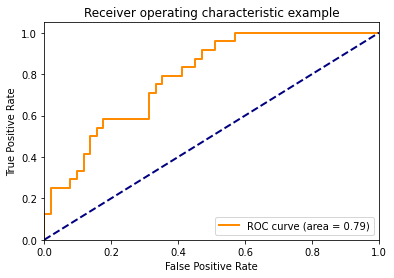

In [65]:
# Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(
    fpr[2], 
    tpr[2], 
    color='darkorange',
    lw=lw, 
    label='ROC curve (area = %0.2f)' % roc_auc[2]
)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**2\. [Plot ROC curves for the multilabel problem](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#plot-roc-curves-for-the-multilabel-problem)**

Compute **macro-average ROC curve** and **ROC area**.

In [66]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
print("all_fpr:", all_fpr)

all_fpr: [0.         0.01851852 0.01960784 0.02222222 0.03703704 0.05555556
 0.07407407 0.07843137 0.09259259 0.09803922 0.11111111 0.11764706
 0.12962963 0.1372549  0.14814815 0.15686275 0.17647059 0.17777778
 0.2        0.2037037  0.24444444 0.26666667 0.27777778 0.31372549
 0.33333333 0.35294118 0.37777778 0.41176471 0.42222222 0.45098039
 0.47058824 0.48888889 0.50980392 0.55555556 0.56862745 0.62222222
 0.64444444 0.66666667 0.73333333 0.75555556 0.88888889 1.        ]


In [67]:
# Then *interpolate all ROC curves* at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

<ipython-input-67-47c6b6d41ae3>:4: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


In [68]:
# Finally average it and compute AUC
mean_tpr /= n_classes
print(mean_tpr)

[0.13373016 0.14960317 0.19126984 0.20238095 0.25       0.26587302
 0.3452381  0.35912698 0.375      0.38888889 0.4        0.42777778
 0.45952381 0.48730159 0.53492063 0.54880952 0.56269841 0.58492063
 0.60714286 0.62301587 0.6452381  0.65634921 0.67222222 0.71388889
 0.72777778 0.74166667 0.76388889 0.77777778 0.8        0.81388889
 0.82777778 0.83888889 0.85277778 0.86388889 0.87777778 0.9
 0.91111111 0.96666667 0.97777778 0.98888889 1.         1.        ]


In [69]:
# Get macro AUC
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr  # The above `mean_tpr` was needed for macro-averaged TPR.
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

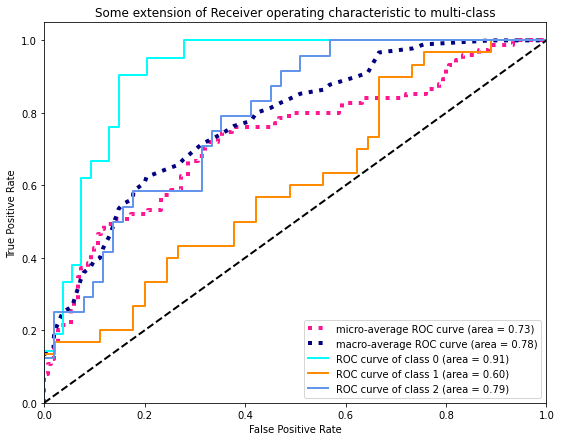

In [70]:
# Plot all ROC curves
plt.figure(figsize=(9,7))

# --- Micro-averaged ---
plt.plot(
    fpr["micro"], 
    tpr["micro"],
    label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
    color='deeppink', 
    linestyle=':', 
    linewidth=4
)

# --- Macro-averaged ---
plt.plot(
    fpr["macro"], 
    tpr["macro"],
    label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
    color='navy', 
    linestyle=':', 
    linewidth=4
)

# --- Individual classes ---
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i], 
        tpr[i], 
        color=color, 
        lw=lw,
        label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

**2\. [Area under ROC for the multiclass problem](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#area-under-roc-for-the-multiclass-problem)**

The `sklearn.metrics.roc_auc_score` function can be used for multi-class classification. 

The multi-class *One-vs-One* scheme compares every unique pairwise combination of classes. 

In this section, we calculate the AUC using the **OvR** and **OvO** schemes. 

We report a macro average, and a prevalence-weighted average.

In [71]:
y_prob = classifier.predict_proba(X_test)

In [72]:
macro_roc_auc_ovo = roc_auc_score(
    y_test, 
    y_prob, 
    multi_class="ovo",
    average="macro"
)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, 
    y_prob, 
    multi_class="ovo",
    average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(
    y_test, 
    y_prob, 
    multi_class="ovr",
    average="macro"
)
weighted_roc_auc_ovr = roc_auc_score(
    y_test, 
    y_prob, 
    multi_class="ovr",
    average="weighted"
)
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} (weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} (weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

# Note: in this example, OvO and OvR results end up identical.

One-vs-One ROC AUC scores:
0.698586 (macro),
0.665839 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.698586 (macro),
0.665839 (weighted by prevalence)


---

#### 📑 [Receiver operating characteristic (ROC) *(contd.)*](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)

##### ↳ 📑 [Binary case](https://scikit-learn.org/stable/modules/model_evaluation.html#binary-case)

In the **binary case**, you can either: 
* provide the **probability estimates**, using the `classifier.predict_proba()` method, or 
* the **non-thresholded decision values** given by the `classifier.decision_function()` method. 

‼️ In the case of providing the probability estimates, *the probability of the class with the "greater label" should be provided*. The "greater label" corresponds to `classifier.classes_[1]` and thus `classifier.predict_proba(X)[:, 1]`. Therefore, the `y_score` parameter is of size `(n_samples,)`.

In [73]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [74]:
X, y = load_breast_cancer(return_X_y=True)
print("X[0]:\n", X[0])
print("y[0]:\n", y[0])

X[0]:
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
y[0]:
 0


In [75]:
clf = LogisticRegression(solver="liblinear").fit(X, y)
clf.classes_

array([0, 1])

In [91]:
# We can use the probability estimates corresponding to clf.classes_[1].

predict_proba = clf.predict_proba(X)
print("predict_proba.shape:", predict_proba.shape)
print("predict_proba:\n", predict_proba[:3], "\n ...")
print()

y_score = predict_proba[:, 1]
print("y_score = predict_proba[:, 1]:\n", predict_proba[:, 1][:3], "...")
print()

print(
    "roc_auc_score(y, y_score):\n",
    roc_auc_score(y, y_score)  # <-- Use of `roc_auc_score()` function.
)

predict_proba.shape: (569, 2)
predict_proba:
 [[1.00000000e+00 3.93157374e-15]
 [9.99999978e-01 2.21690071e-08]
 [9.99999952e-01 4.81860186e-08]] 
 ...

y_score = predict_proba[:, 1]:
 [3.93157374e-15 2.21690071e-08 4.81860186e-08] ...

roc_auc_score(y, y_score):
 0.9947016542466043


In [97]:
# Otherwise, we can use the non-thresholded decision values.

non_thresholded_decision_values = clf.decision_function(X)
print(
    "non_thresholded_decision_values = clf.decision_function(X):\n",
    non_thresholded_decision_values[:3], "..."
)
print(
    "roc_auc_score(y, non_thresholded_decision_values)\n",
    roc_auc_score(y, non_thresholded_decision_values)  # <-- Use of `roc_auc_score()` function.
)

# ‼️ NOTE SAME RESULT BY EITHER METHOD!

non_thresholded_decision_values = clf.decision_function(X):
 [-33.16973661 -17.62457058 -16.84819688] ...
roc_auc_score(y, non_thresholded_decision_values)
 0.9947016542466043


##### ↳ 📑 [Multi-class case](https://scikit-learn.org/stable/modules/model_evaluation.html#multi-class-case)

The `roc_auc_score` function **can also be used in multi-class classification**. 

Two averaging strategies are currently supported: 
* the one-vs-one (OvO) algorithm computes the average of *the pairwise ROC AUC scores*, 
* and the one-vs-rest (OvR) algorithm computes *the average of the ROC AUC scores for each class against all other classes*.

In both cases: 
* the *predicted labels* are provided in an *array with values from `0` to `n_classes`*, 
* and the *scores* correspond to the probability estimates that a sample belongs to a particular class. 

The OvO and OvR algorithms support weighting uniformly (`average='macro'`) and by prevalence (`average='weighted'`).

🎓⚠️ The exact details of OvO and OvR multi-class ROC AUC computation algorithms are given [in the guide](https://scikit-learn.org/stable/modules/model_evaluation.html#multi-class-case).

##### ↳ 📑 [Multi-label case](https://scikit-learn.org/stable/modules/model_evaluation.html#multi-label-case)

In **multi-*label* classification**, the `roc_auc_score` function is extended by averaging over the labels as in [*"From binary to multiclass and multilabel" section*](https://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel). 

In this case, you should provide a `y_score` of shape `(n_samples, n_classes)`. 

*Thus, when using the probability estimates, one needs to select the probability of the class with the greater label for each output:*

In [128]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier

X, y = make_multilabel_classification(
    n_classes=5,  # NOTE 5 CLASSES!
    random_state=0    
)
print("DATA:")
print("y[0]:\n", y[0])
print()

inner_clf = LogisticRegression(solver="liblinear", random_state=0)
clf = MultiOutputClassifier(inner_clf).fit(X, y)  # MultiOutputClassifier to get multi-label scenario.

predict_proba = clf.predict_proba(X)
print(
    "clf.predict_proba(X) as returned by MultiOutputClassifier:\n",
    "list of length", len(predict_proba), "(n_classes)\n",
    "each of shape", predict_proba[0].shape, "elements being (prob_yes, prob_no)\n",
    str([cl[:3] for cl in predict_proba]).replace("), array(", ") ...,\n  array(")
)

y_score = np.transpose(
    [y_pred[:, 1] for y_pred in predict_proba]  # <-- ! select the probability of the class with the greater label for each output !
)
print(
    "\ny_score (selected the probability of the class with the greater label for each output):\n",
    f"one numpy array of shape {y_score.shape} that is (n_samples, n_classes)\n",
    y_score[:3], "\n ..."
)
print()

print(
    "roc_auc_score(y, y_score, average=None):\n", 
    roc_auc_score(y, y_score, average=None)
)

DATA:
y[0]:
 [0 0 1 1 1]

clf.predict_proba(X) as returned by MultiOutputClassifier:
 list of length 5 (n_classes)
 each of shape (100, 2) elements being (prob_yes, prob_no)
 [array([[0.9777656 , 0.0222344 ],
       [0.90666407, 0.09333593],
       [0.2920559 , 0.7079441 ]]) ...,
  array([[0.73515422, 0.26484578],
       [0.76846371, 0.23153629],
       [0.51711897, 0.48288103]]) ...,
  array([[5.22115744e-01, 4.77884256e-01],
       [4.29250996e-04, 9.99570749e-01],
       [9.61521888e-01, 3.84781117e-02]]) ...,
  array([[0.20277053, 0.79722947],
       [0.72107012, 0.27892988],
       [0.16995853, 0.83004147]]) ...,
  array([[0.05504693, 0.94495307],
       [0.9128426 , 0.0871574 ],
       [0.97975129, 0.02024871]])]

y_score (selected the probability of the class with the greater label for each output):
 one numpy array of shape (100, 5) that is (n_samples, n_classes)
 [[0.0222344  0.26484578 0.47788426 0.79722947 0.94495307]
 [0.09333593 0.23153629 0.99957075 0.27892988 0.0871574 ]

In [129]:
# And the decision values do not require such processing.

from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV().fit(X, y)
y_score = clf.decision_function(X)

roc_auc_score(y, y_score, average=None)

array([0.81996435, 0.8467387 , 0.93090909, 0.87229702, 0.94422994])

#### 📑 [Detection error tradeoff (DET)](https://scikit-learn.org/stable/modules/model_evaluation.html#detection-error-tradeoff-det)

🚧 TBD

#### 📑 [Zero one loss](https://scikit-learn.org/stable/modules/model_evaluation.html#zero-one-loss)

🚧 TBD

#### 📑 [Brier score loss](https://scikit-learn.org/stable/modules/model_evaluation.html#brier-score-loss)

The `brier_score_loss` function computes the [Brier score](https://en.wikipedia.org/wiki/Brier_score) for binary classes [Brier1950](https://scikit-learn.org/stable/modules/model_evaluation.html#brier1950). 

Quoting Wikipedia:
> The Brier score is a proper score function that measures the accuracy of probabilistic predictions. It is applicable to tasks in which predictions must assign probabilities to a set of mutually exclusive discrete outcomes.

This function returns the **mean squared error of** the *actual outcome* $y \in \{0,1\}$ and the *predicted probability estimate* $p = \Pr(y=1)$ (`predict_proba`) as outputted by:

$
BS = \frac{1}{n_{samples}} \sum^{n_{samples}-1}_{i=0} (y_i - p_i)^2
$

The Brier score loss is also between 0 to 1 and the lower the value (the mean square difference is smaller), the more accurate the prediction is.

Here is a small example of usage of this function:

In [136]:
import numpy as np
from sklearn.metrics import brier_score_loss

y_true = np.array([0, 1, 1, 0])
y_true_categorical = np.array(["spam", "ham", "ham", "spam"])
y_prob = np.array([0.1, 0.9, 0.8, 0.4])
y_pred = np.array([0, 1, 1, 0])

In [137]:
brier_score_loss(y_true, y_prob)

0.055

In [138]:
brier_score_loss(y_true, 1 - y_prob, pos_label=0)

0.055

In [139]:
brier_score_loss(y_true_categorical, y_prob, pos_label="ham")

0.055

In [145]:
print("y_true:", y_true)
print("(y_prob > 0.5).astype(int):", (y_prob > 0.5).astype(int))

brier_score_loss(y_true, (y_prob > 0.5).astype(int))

y_true: [0 1 1 0]
(y_prob > 0.5).astype(int): [0 1 1 0]


0.0

⚠️ The Brier score can be used to assess how well a classifier is calibrated. However, a lower Brier score loss does not always mean a better calibration. This is because, by analogy with the bias-variance decomposition of the mean squared error, the Brier score loss can be decomposed as the sum of calibration loss and refinement loss [Bella2012](https://scikit-learn.org/stable/modules/model_evaluation.html#bella2012). Calibration loss is defined as the mean squared deviation from empirical probabilities derived from the slope of ROC segments. Refinement loss can be defined as the expected optimal loss as measured by the area under the optimal cost curve. Refinement loss can change independently from calibration loss, thus a lower Brier score loss does not necessarily mean a better calibrated model. “Only when refinement loss remains the same does a lower Brier score loss always mean better calibration” [Bella2012](https://scikit-learn.org/stable/modules/model_evaluation.html#bella2012), [Flach2008](https://scikit-learn.org/stable/modules/model_evaluation.html#flach2008).

## [Multilabel ranking metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics)

In multilabel learning, each sample can have **any number of ground truth labels associated with it**. 

*The goal is to give high scores and better rank to the ground truth labels.*

#### 📑 [Coverage error](https://scikit-learn.org/stable/modules/model_evaluation.html#coverage-error)

🚧 TBD

#### 📑 [Label ranking average precision](https://scikit-learn.org/stable/modules/model_evaluation.html#label-ranking-average-precision)

🚧 TBD

#### 📑 [Ranking loss](https://scikit-learn.org/stable/modules/model_evaluation.html#ranking-loss)

🚧 TBD

#### 📑 [Normalized Discounted Cumulative Gain](https://scikit-learn.org/stable/modules/model_evaluation.html#normalized-discounted-cumulative-gain)

🚧 TBD

## [Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

The `sklearn.metrics` module implements several 
* loss, 
* score, and 
* utility 

functions to measure regression performance. 

Some of those have been **enhanced to handle the multioutput case**: 
* `mean_squared_error`, 
* `mean_absolute_error`, 
* `explained_variance_score` and 
* `r2_score`.

These functions have a `multioutput` keyword argument which specifies the way the scores or losses for each individual target should be averaged. 
* The default is `'uniform_average'`, which specifies a uniformly weighted mean over outputs. 
* If an `ndarray` of shape `(n_outputs,)` is passed, then its entries are interpreted as weights and an according weighted average is returned. 
* If `multioutput='raw_values'` is specified, then all unaltered individual scores or losses will be returned in an array of shape `(n_outputs,)`.

The `r2_score` and `explained_variance_score` accept an additional value `'variance_weighted'` for the multioutput parameter. This option leads to a weighting of each individual score by the variance of the corresponding target variable. This setting quantifies the globally captured unscaled variance. If the target variables are of different scale, then this score puts more importance on well explaining the higher variance variables. `multioutput='variance_weighted'` is the default value for `r2_score` for backward compatibility. This will be changed to `uniform_average` in the future.

#### 📑 [Explained variance score](https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score)

The `explained_variance_score` computes the **explained variance regression score**.

If $\hat{y}$ is the estimated target output, $y$ the corresponding (correct) target output, and $Var{}$ is Variance (the square of the standard deviation), then the explained variance is estimated as follows:

$
\text{explained_variance}(y,\hat{y}) = 1 - \frac{Var\{y-\hat{y}\}}{Var\{y\}}
$

The best possible score is 1.0, lower values are worse.

Here is a small example of usage of the `explained_variance_score` function:

In [146]:
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
explained_variance_score(y_true, y_pred)

0.9571734475374732

In [147]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
explained_variance_score(y_true, y_pred, multioutput='raw_values')

array([0.96774194, 1.        ])

In [149]:
explained_variance_score(y_true, y_pred, multioutput=[0.3, 0.7])

0.9903225806451612

#### 📑 [Max error](https://scikit-learn.org/stable/modules/model_evaluation.html#max-error)

The `max_error` function computes the maximum residual error, a metric that captures the worst case error between the predicted value and the true value. In a perfectly fitted single output regression model, `max_error` would be 0 on the training set and though this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.

The `max_error` does not support multioutput.

Here is a small example of usage of the `max_error` function:

In [150]:
from sklearn.metrics import max_error
y_true = [3, 2, 7, 1]
y_pred = [9, 2, 7, 1]
max_error(y_true, y_pred)

6

#### 📑 [Mean absolute error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)

The `mean_absolute_error` function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or $l_1$-norm loss.

Here is a small example of usage of the mean_absolute_error function:

In [151]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

In [153]:
# Multi-outpit cases:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]

In [154]:
mean_absolute_error(y_true, y_pred)

0.75

In [155]:
mean_absolute_error(y_true, y_pred, multioutput='raw_values')

array([0.5, 1. ])

In [156]:
mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.85

#### 📑 [Mean squared error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

The `mean_squared_error` function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

Here is a small example of usage of the mean_squared_error function:

In [157]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [158]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_squared_error(y_true, y_pred)

0.7083333333333334

#### 📑 [Mean squared logarithmic error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error)

🚧 TBD

#### 📑 [Mean absolute percentage error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-percentage-error)

The `mean_absolute_percentage_error` (MAPE), also known as mean absolute percentage deviation (MAPD), is an evaluation metric for regression problems. 

*The idea of this metric is to be sensitive to relative errors. It is for example not changed by a global scaling of the target variable.*

If $\hat{y}_i$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value, then the mean absolute percentage error (MAPE) estimated over $n_{samples}$ is defined as:

$
\text{MAPE}(y, \hat{y}) =  \frac{1}{n_{samples}} \sum^{n_{samples}-1}_{i=0} \frac{|y_i - \hat{y}_i|}{\max{(\epsilon, |y_i|)}}
$

where $\epsilon$ is an arbitrary small yet strictly positive number to avoid undefined results when y is zero.

The `mean_absolute_percentage_error` function supports multioutput.

Here is a small example of usage of the `mean_absolute_percentage_error` function:

In [159]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = [1, 10, 1e6]
y_pred = [0.9, 15, 1.2e6]
mean_absolute_percentage_error(y_true, y_pred)

0.26666666666666666

❗ In above example, if we had used `mean_absolute_error`, it would have ignored the small magnitude values and only reflected the error in prediction of highest magnitude value. But that problem is resolved in case of MAPE because it calculates relative percentage error with respect to actual output.

#### 📑 [Median absolute error](https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error)

The `median_absolute_error` is *particularly interesting because it is **robust to outliers***. 

The loss is calculated by taking the median of all absolute differences between the target and the prediction.

Here is a small example of usage of the `median_absolute_error` function:

In [160]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

#### 📑 [R² score, the coefficient of determination](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination)

The `r2_score` function computes the [**coefficient of determination**](https://en.wikipedia.org/wiki/Coefficient_of_determination), usually denoted as **R²**.

It represents the proportion of variance (of $y$) that has been explained by the independent variables ($X$) in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

❗ As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. 

Best possible score is `1.0` and it *can be negative* (because the model can be arbitrarily worse). A constant model that always predicts the expected value of $y$, disregarding the input features, would get a R² score of `0.0`.

If $\hat{y}_i$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value for total samples, the estimated R² is defined as:

$
R^2(y,\hat{y}) = 1 - \frac{\sum^{n}_{i=1}(y_i-\hat{y}_i)^2}{\sum^{n}_{i=1}(y_i-\bar{y})^2}
$

where $\bar{y} = \frac{1}{n}\sum^{n}_{i=1} y_i$

Note that `r2_score` calculates **unadjusted R²** without correcting for bias in sample variance of $y$.

Here is a small example of usage of the r2_score function:

In [161]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

In [162]:
# Multi-output case:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
r2_score(y_true, y_pred, multioutput='variance_weighted')

0.9382566585956417

In [163]:
r2_score(y_true, y_pred, multioutput='raw_values')

array([0.96543779, 0.90816327])

In [165]:
r2_score(y_true, y_pred, multioutput=[0.3, 0.7])  # Custom weighting

0.9253456221198156

#### 📑 [Mean Poisson, Gamma, and Tweedie deviances](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-poisson-gamma-and-tweedie-deviances)

🚧 TBD

## [Clustering metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#clustering-metrics)

The `sklearn.metrics` module implements several loss, score, and utility functions. 

For more information see: 
* ➯ the [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation) section for instance clustering, and 
* ➯ [Biclustering evaluation](https://scikit-learn.org/stable/modules/biclustering.html#biclustering-evaluation) for biclustering.


## [💡 Dummy estimators](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)

When doing supervised learning, a simple sanity check consists of comparing one’s estimator against simple rules of thumb. 

`DummyClassifier` implements several such simple strategies for classification:
* `stratified` generates random predictions by respecting the training set class distribution.
* `most_frequent` always predicts the most frequent label in the training set.
* `prior` always predicts the class that maximizes the class prior (like `most_frequent`) and `predict_proba` returns the class prior.
* `uniform` generates predictions uniformly at random.
* **constant always predicts a constant label that is provided by the user.**
    * A major motivation of this method is F1-scoring, when the positive class is in the minority.

❗ Note that with all these strategies, the `predict` method completely ignores the input data!

To illustrate `DummyClassifier`, first let’s create an imbalanced dataset:

In [168]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
print("X[:3]:\n", X[:3])
y[y != 1] = -1
print("y[:3]:\n", y[:3])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X[:3]:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
y[:3]:
 [-1 -1 -1]


Next, let’s compare the accuracy of `SVC` and `most_frequent`:

In [169]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.631578947368421

In [170]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5789473684210527

**We see that SVC doesn’t do much better than a dummy classifier!** 

Now, let’s change the kernel:

In [171]:
clf = SVC(kernel='rbf', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9473684210526315

More generally, when the accuracy of a classifier is too close to random, it probably means that something went wrong: features are not helpful, a hyperparameter is not correctly tuned, the classifier is suffering from class imbalance, etc. ...

`DummyRegressor` also implements four simple rules of thumb for regression:
* `mean` always predicts the mean of the training targets.
* `median` always predicts the median of the training targets.
* `quantile` always predicts a user provided quantile of the training targets.
* `constant` always predicts a constant value that is provided by the user.

❗ In all these strategies, the predict method completely ignores the input data.